In [1]:
import pandas

In [3]:
import pandas as pd

df = pd.read_csv('/content/listings (1).csv')
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37736,Charming cozy apartment North Italy,162348,Daniele,NaN,Trentino,46.43561,11.10380,Entire home/apt,93.0,7,128,2025-09-14,0.70,4,82,16,IT022253B566UC9TNJ
1,56292,Central apartment located on the ski slopes,266605,Stefano,NaN,Trentino,46.23199,10.82732,Entire home/apt,90.0,7,23,2025-08-23,0.22,1,312,10,IT022143C2IU7Z7ICY
2,249351,B&B Casa dei Ricci in the Dolomites,1306234,Maddalena,NaN,Trentino,46.36155,10.91591,Private room,72.0,31,12,2018-08-11,0.07,1,283,0,NaN
3,299464,Residence Segattini Studio 2-3 Persone,1543124,Cristiano,NaN,Trentino,45.90883,10.84660,Entire home/apt,94.0,3,1,2022-01-02,0.02,11,277,0,IT022153B4C5REPYIH
4,367596,"Apartment in Val Rendena, Pinzolo",1854440,Franca,NaN,Trentino,46.15799,10.76669,Entire home/apt,91.0,3,44,2025-07-12,0.28,1,73,8,IT022143C2SDGYRLIZ


In [10]:
import numpy as np

bins = [0, 1, 3, 10, 30, 50, 70, 100, np.inf]
labels = ['1', '2-3', '4-10', '11-30', '31-50', '51-70', '71-100', '101+']

host_property_counts['property_clusters'] = pd.cut(
    host_property_counts['num_properties'],
    bins=bins,
    labels=labels,
    right=True, # (a, b], so 1 property falls into '1'
    include_lowest=True # To include values equal to the lowest bin edge (0 in this case, but num_properties starts from 1)
)

cluster_distribution = host_property_counts['property_clusters'].value_counts().sort_index()
display(cluster_distribution)

,count
property_clusters,
1,3342
2-3,896
4-10,300
11-30,57
31-50,8
51-70,2
71-100,6
101+,2


/tmp/ipython-input-4284450130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')


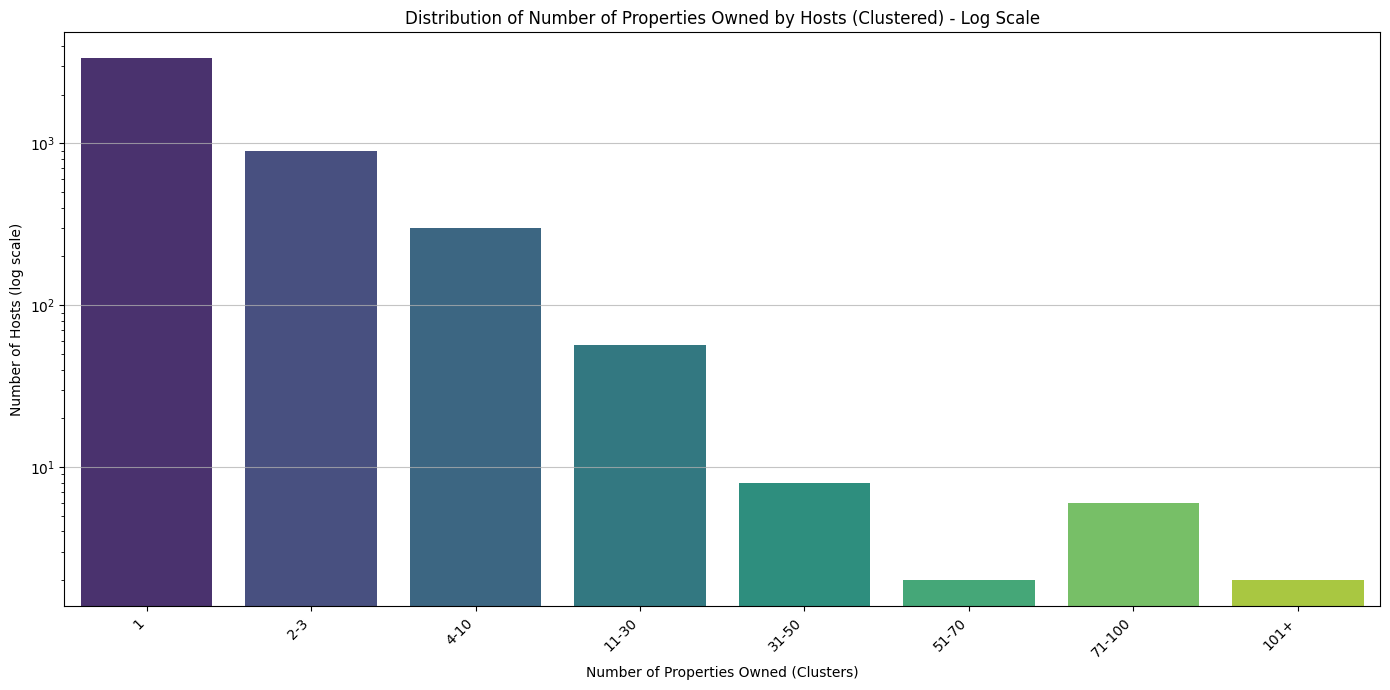

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')
plt.title('Distribution of Number of Properties Owned by Hosts (Clustered) - Log Scale')
plt.xlabel('Number of Properties Owned (Clusters)')
plt.ylabel('Number of Hosts (log scale)')
plt.yscale('log') # Apply log scale to the y-axis
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
total_hosts = cluster_distribution.sum()
percentage_distribution = (cluster_distribution / total_hosts * 100).round(2)

print(f"Total number of hosts: {total_hosts}")
display(percentage_distribution)

Total number of hosts: 4613


,count
property_clusters,
1,72.45
2-3,19.42
4-10,6.50
11-30,1.24
31-50,0.17
51-70,0.04
71-100,0.13
101+,0.04


In [5]:
property_distribution = host_property_counts['num_properties'].value_counts().sort_index()
display(property_distribution)

,count
num_properties,
1,3342
2,598
3,298
4,129
5,63
6,35
7,32
8,23
9,14


In [17]:
hosts_over_70_properties = host_property_counts[host_property_counts['num_properties'] > 70]
properties_by_over_70_owners = hosts_over_70_properties['num_properties'].sum()

print(f"Number of properties owned by hosts with more than 70 properties: {properties_by_over_70_owners}")

Number of properties owned by hosts with more than 70 properties: 758


In [19]:
hosts_over_10_properties = host_property_counts[host_property_counts['num_properties'] > 10]
properties_by_over_10_owners = hosts_over_10_properties['num_properties'].sum()

print(f"Number of properties owned by hosts with more than 10 properties: {properties_by_over_10_owners}")

Number of properties owned by hosts with more than 10 properties: 2172


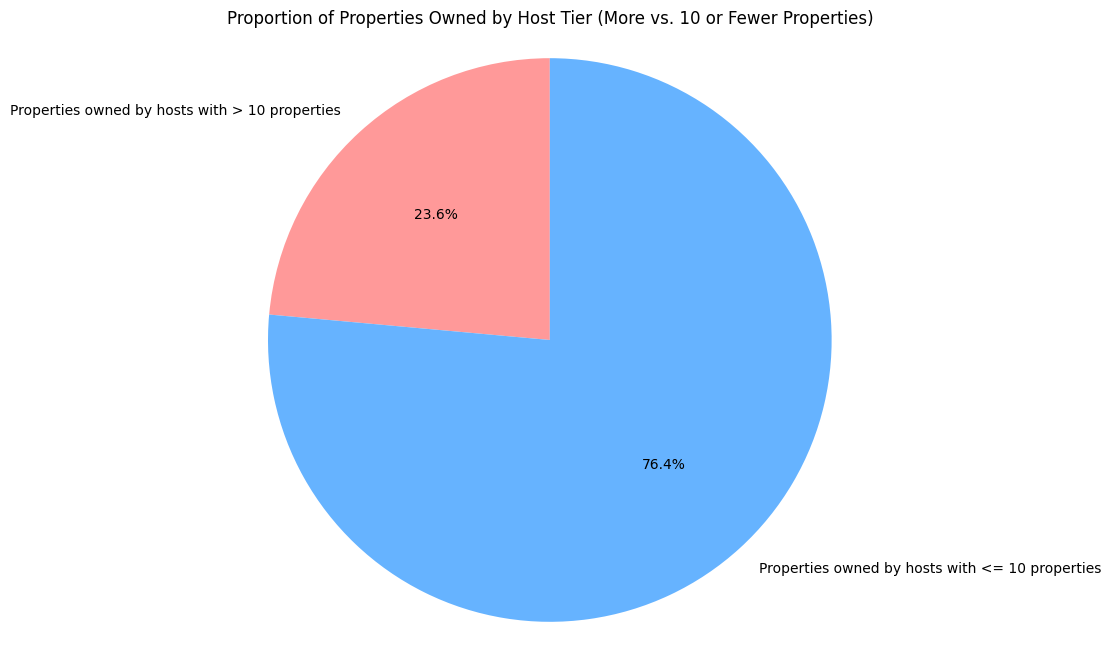

In [20]:
# Calculate properties owned by hosts with 10 or fewer properties
properties_by_10_or_fewer_owners = total_properties - properties_by_over_10_owners

# Create a Series for plotting
property_ownership_breakdown = pd.Series({
    'Properties owned by hosts with > 10 properties': properties_by_over_10_owners,
    'Properties owned by hosts with <= 10 properties': properties_by_10_or_fewer_owners
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(property_ownership_breakdown, labels=property_ownership_breakdown.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Properties Owned by Host Tier (More vs. 10 or Fewer Properties)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
hosts_over_100_properties = host_property_counts[host_property_counts['num_properties'] > 100]
properties_by_over_100_owners = hosts_over_100_properties['num_properties'].sum()

# total_properties is already calculated from a previous step
# total_properties = host_property_counts['num_properties'].sum()

percentage_properties_by_over_100_owners = (properties_by_over_100_owners / total_properties) * 100

print(f"Number of properties owned by hosts with more than 100 properties: {properties_by_over_100_owners}")
print(f"Percentage of total properties owned by hosts with more than 100 properties: {percentage_properties_by_over_100_owners:.2f}%")

Number of properties owned by hosts with more than 100 properties: 286
Percentage of total properties owned by hosts with more than 100 properties: 3.10%


/tmp/ipython-input-3681003933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette='viridis')


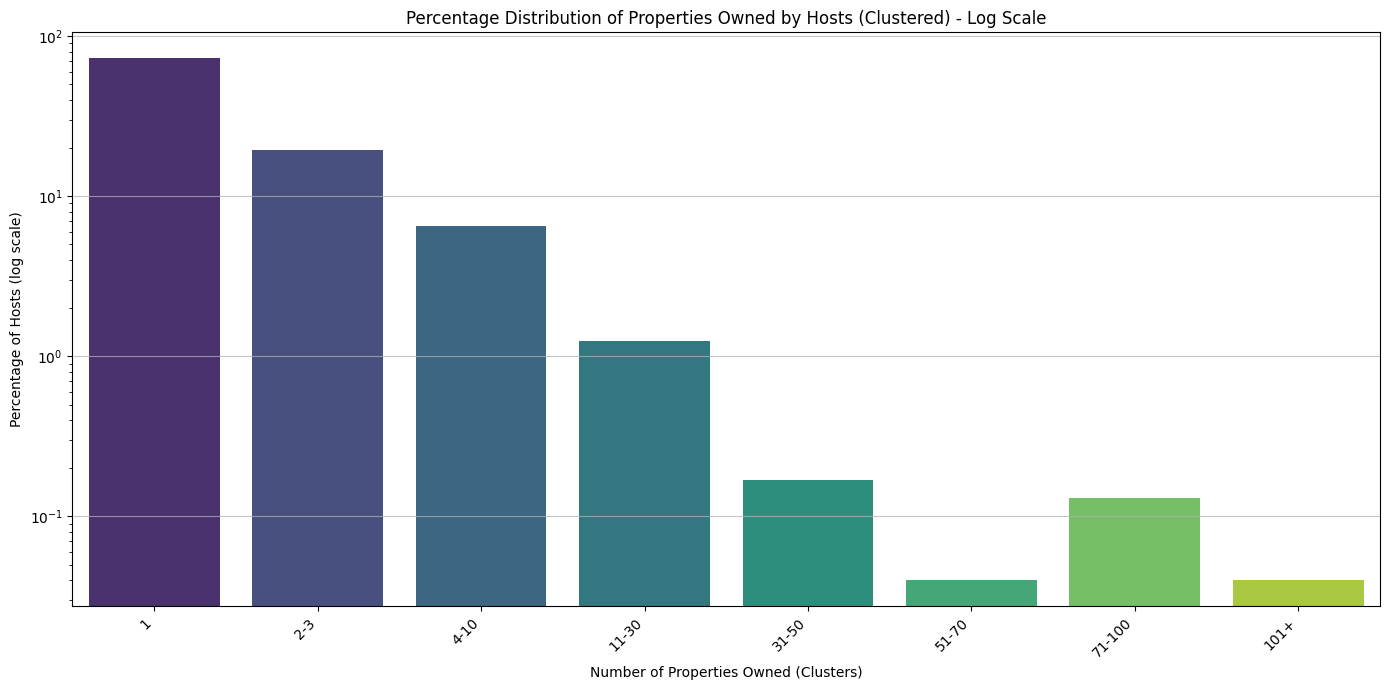

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette='viridis')
plt.title('Percentage Distribution of Properties Owned by Hosts (Clustered) - Log Scale')
plt.xlabel('Number of Properties Owned (Clusters)')
plt.ylabel('Percentage of Hosts (log scale)')
plt.yscale('log') # Apply log scale to the y-axis
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
total_properties = host_property_counts['num_properties'].sum()

hosts_with_multiple_properties = host_property_counts[host_property_counts['num_properties'] > 1]
properties_by_multiple_owners = hosts_with_multiple_properties['num_properties'].sum()

percentage_properties_by_multiple_owners = (properties_by_multiple_owners / total_properties) * 100

print(f"Total number of properties: {total_properties}")
print(f"Number of properties owned by hosts with multiple properties: {properties_by_multiple_owners}")
print(f"Percentage of properties owned by hosts with multiple properties: {percentage_properties_by_multiple_owners:.2f}%")

Total number of properties: 9219
Number of properties owned by hosts with multiple properties: 5877
Percentage of properties owned by hosts with multiple properties: 63.75%


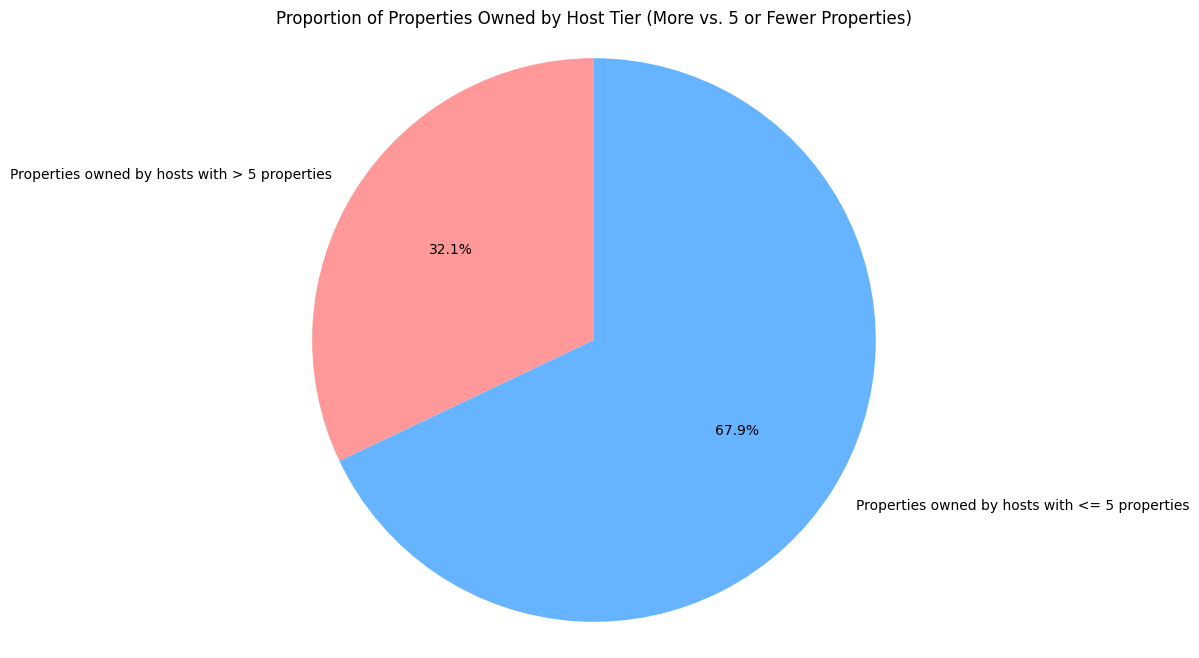

In [21]:
hosts_over_5_properties = host_property_counts[host_property_counts['num_properties'] > 5]
properties_by_over_5_owners = hosts_over_5_properties['num_properties'].sum()

properties_by_5_or_fewer_owners = total_properties - properties_by_over_5_owners

property_ownership_breakdown_5 = pd.Series({
    'Properties owned by hosts with > 5 properties': properties_by_over_5_owners,
    'Properties owned by hosts with <= 5 properties': properties_by_5_or_fewer_owners
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(property_ownership_breakdown_5, labels=property_ownership_breakdown_5.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Properties Owned by Host Tier (More vs. 5 or Fewer Properties)')
plt.axis('equal')
plt.show()